<a href="https://colab.research.google.com/github/Nichika0617/BasicSeminar/blob/main/BasicSeminar3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Numpyを用いたデータセットの作成

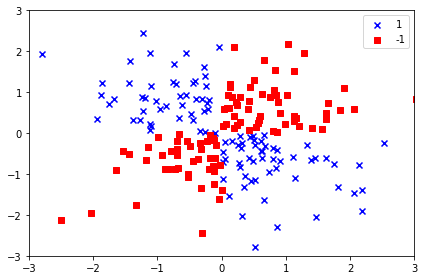

In [ ]:
# 乱数シードを指定
np.random.seed(1)

# 標準正規分布に従う乱数で200行2列の行列を生成
X_xor = np.random.randn(200, 2) # 平均0，分散1，標準偏差1である標準正規分布に従う乱数を返す．

# print(X_xor[:,0]) #  1.62434536 -0.52817175  0.86540763...
# print(X_xor[:,1]) # -0.61175641 -1.07296862 -2.3015387...

#二つの引数に対して排他的論理和を実行 
# True ^ True → False ，
# True ^ False → True　というようになり，どちらかが正(True)の場合のみ，結果はTrueとなる．
# 一列目か二列目のどちらか一方が正となるかどうかを判別する．
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# print(y_xor) # True False  True...


# 排他的論理和の値が真の場合は1，偽の場合は-1を割り当てる．
# numpy.whereは、NumPy配列の要素のうち、
# 特定の条件に合致するものをxで置換し、それ以外をy で置換する関数
y_xor = np.where(y_xor, 1, -1) # Trueの部分を1 Falseの部分を-1
# print(y_xor) # 1 -1  1...



# ラベル1を青のxでプロット
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
# plt.scatter(1.62434536, -0.61175641, c='g', marker='x', label='1') # 理解のため一つ目の場所を緑で，

# ラベル-1を赤の四角でプロット
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')


# 軸の範囲
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()

plt.show()


ランダムなノイズを含んだ XOR データセットが得られた．

# カーネルSVMの訓練 RBFカーネル，

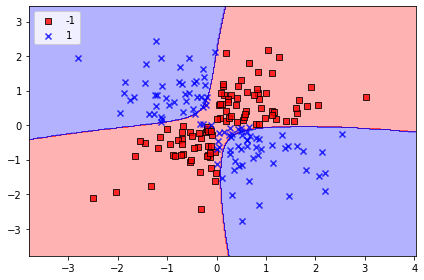

In [ ]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from distutils.version import LooseVersion
import matplotlib

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02): #P31 二次元のデータセットを可視化する関数

    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を一次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        


# RBF カーネルによるSVMのインスタンスを生成
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C = 10.0)
# svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C = 1.0) # 教科書ではこう...
# γパラメータは，このカーネル関数(RBFカーネル)のカットオフ(限界値条件)．下に，γパラメータの実験あり．

svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



カーネル SVM は XOR データをかなりうまく分割していることがわかります．

# γパラメータの実験

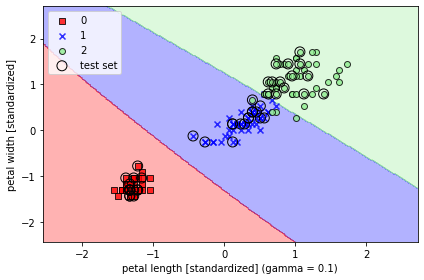

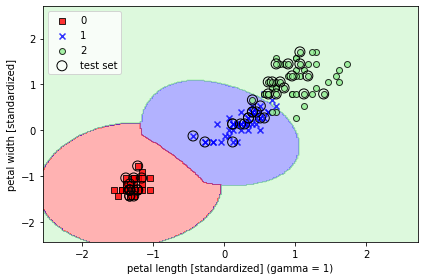

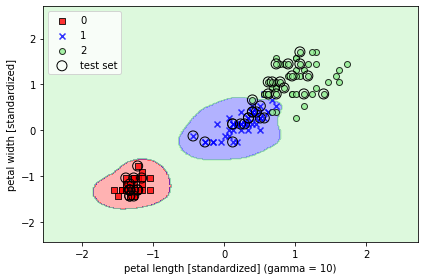

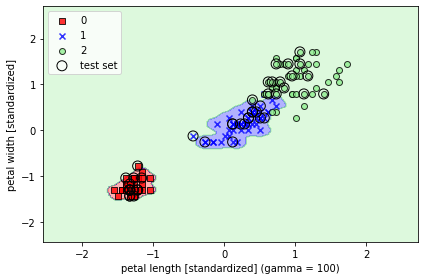

In [ ]:
# γパラメータについての検証
# γパラメータは，このカーネル関数(RBFカーネル)のカットオフ(限界値条件)であり．
# 値を大きくすると訓練データの影響力が大きくなり， 到達範囲が広くなる．
# →決定境界がより狭くなり，突き出したようになる．


# RBFカーネルによるSVMのインスタンスを生成(2つのパラメータを変更)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
iris = datasets.load_iris()
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


gamma_list = [0.1, 1, 10, 100] # γパラメータの値リスト
for i in gamma_list:
  svm = SVC(kernel='rbf', random_state=1, gamma=i, C=1.0)

  svm.fit(X_train_std, y_train)

  X_combined_std = np.vstack((X_train_std, X_test_std))
  y_combined = np.hstack((y_train, y_test))

  plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
  plt.xlabel('petal length [standardized] (gamma = ' + str(i) + ')')
  plt.ylabel('petal width [standardized]')
  plt.legend(loc='upper left')
  plt.tight_layout()

  plt.show()



結果から，γパラメータに大きな値を使うと，クラス0とクラス1のまわりの決定境界がかなり複雑になることがわかる．
訓練データセットに非常にうまく適合するが，このような分類機では未知のデータでは大きな誤差が生じることが考えられる．

過学習などを避けるため，γパラメータの最適化は重要な役割を果たすことが分かった．


# 3 種類の不純度条件を視覚的に比較

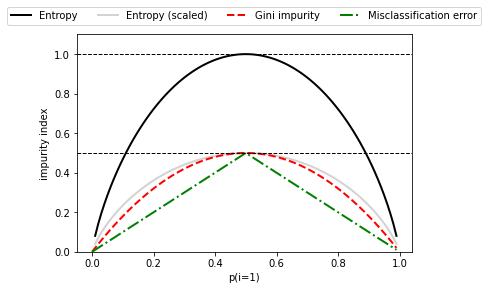

In [ ]:
# P86

# ジニ不純度の関数を定義
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

# エントロピーの関数を定義
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

# 分類誤差の関数を定義
def error(p):
    return 1 - np.max([p, 1 - p])

# 確率を表す配列を生成(0から0.99まで，0.01刻み)
x = np.arange(0.0, 1.0, 0.01)

# 配列の値をもとにエントロピー，分類誤差を計算
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

# 図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)

# エントロピー(2種)，ジニ不純度，分類誤差のそれぞれをループ処理
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

# 凡例の設定(中央の上に配置)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

# 二本の水平の波線を引く
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

# 横軸の上限，下限を設定
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()



※エントロピーの最大値は 1.0、ジニ不純度は 0.5 なので、比較しやすいようにエントロピーの方を1/2の係数でスケーリングしたものがEntropy(scaled)，

P(i = 1) は，クラス i に所属しているデータ点の割合が1であり，全ての点が同じクラスに所属していることを表す．
よって，エントロピーは全ての点が同じクラスに所属しているとき，0であり，
エントロピーが最大になるのは、各クラスが一様に分布している場合である。
というようにこの結果は見ることができる．

これを踏まえると，
 ジニ不純度とエントロピー(entropy)はどちらも二次曲線をであり， p = 0.5 で最大化していることがわかる

 誤分類率(misclass)は、p = 0.5 で最大化し、p = 0, 1 でゼロに等しく、山なりに変化しており，ジニ不純度，エントロピーと同じ特性を持っているが，線形であるという特徴があることが分かる．

# 決定木の構築

不純度の条件としてジニ不純度を使って最大の深さが 4 の決定木を訓練する．

決定木が深くなればなるほど決定境界は複雑になり、過学習に陥りやすくなるため深さは4とする．

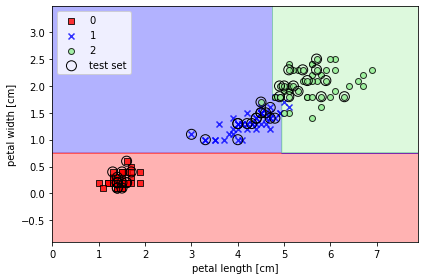

In [ ]:
# 決定木の構築

# P88
from sklearn.tree import DecisionTreeClassifier

# ジニ不純度を指標とする決定木のインスタンスを生成
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)

# 決定木のモデルを訓練データに適合させる
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()



この軸に並行な決定境界は，決定木特有のものである．

scikit-learnの訓練後の決定木モデルを可視化できる機能を使う．

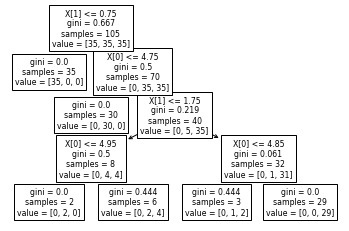

In [ ]:
# P88
from sklearn import tree

tree.plot_tree(tree_model)

plt.show()


さらに可視化を改善↓↓

In [ ]:
# P90
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 


True

![出力された決定木](https://drive.google.com/uc?export=view&id=15HCW8wG-0u8OSEdUwm5s4gShGx6drkpD)



 この決定木の図から、決定木が訓練データセットから判定した分割を正確にたどることができる。
 
まず， 根の 105 個のデータ点を出発点として、花びらの長さがしきい値 0.75cm 以下であることに基づき、 35 個と 70 個のデータ点を持つ2つの子ノードに分割している。

最初の分割の後、左の子ノードがジニ不純度が 0であることから，すで に純粋で、Iris-Setosa クラスのデータ点だけを含んでいることがわかる。

右の子ノードでさらに分割を行い、データ点を Iris-Versicolor クラスと Iris-Virginica クラスに分割している。

# ランダムフォレスト
ブートストラップ標本のサイズ n を使って、 ランダムフォレストのバイアスとバリアンスのトレードオフを制御する。

scikit-learn のRandomForestClassifier実装をはじめとするほとんどの実装では、ブートストラップ標本のサイズ(大きさ)は元の訓練データセットのデータ点の個数と等しくなるように選択される。
それにより、通常はバイアスとバリアンスが適切に調整される。

ランダムフォレスト分類器は scikit-learn にすでに実装されているため、それを利用する．

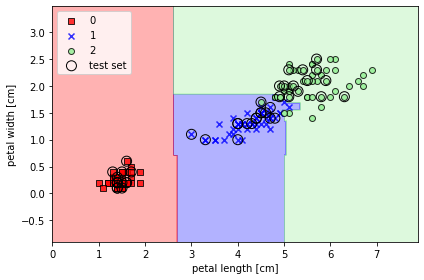

In [ ]:
# P92
from sklearn.ensemble import RandomForestClassifier

# ジニ不純度を指標とするランダムフォレストのインスタンスを生成

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
# n_estimators=25・・・25個の決定木


# 訓練データにランダムフォレストのモデルを適合させる
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()


25 個の決定木からランダムフォレストを訓練 し、不純度の指標としてジニ不純度の条件を使ってノードを分割している。

ランダムフォレストでの決定木のアンサンブルによって形成された決定領域を得ることができた．


# KNNモデル

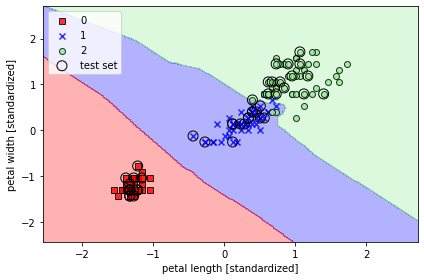

In [ ]:
# P95
from sklearn.neighbors import KNeighborsClassifier
# k最近傍法のモデルを適合させる
knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')

# 訓練データにk最近傍法のモデルを適合させる．
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()


このデータセットの 5 つの近傍を KNN モデルで指定することにより、なめらかな決定境界が得られた．

※多数決が同数である場合、scikit-learn の KNN アルゴリズムの実装では、データ点までの距離
がより近いものが優先される。複数の近傍が同じような距離にある場合は、訓練データセット において最初に現れるクラスラベルが選択される。

 k を「正しく」選択するには、過学習と学習不足のバランスをうまくとることが肝心である。
 また、データセットの特徴量に適した距離指標を選択することも重要となる。多くの場合、実数値のデータ点には単純なユークリッド距離の指標が使われる。たとえば Iris データセットの特徴量はセンチメートル単位
で測定されている。